# Active Subspaces Example Function: Circuit Voltage

##### Ryan Howard, CO School of Mines, <ryhoward@mines.edu>
##### Paul Constantine, CO School of Mines, <pconstan@mines.edu>

<br>

In this tutorial, we'll be applying active subspaces to the function

$$
V_m = \frac{(V_{b1}+0.74)\beta(R_{c2}+9)}{\beta(R_{c2}+9)+R_f}+\frac{11.35R_f}{\beta(R_{c2}+9)+R_f}+\frac{0.74R_f\beta(R_{c2}+9)}{R_{c1}(\beta(R_{c2}+9)+R_f)},
$$

where $V_{b1} = 12R_{b2}/(R_{b1}+R_{b2})$, as seen on [http://www.sfu.ca/~ssurjano/otlcircuit.html](http://www.sfu.ca/~ssurjano/otlcircuit.html). This function models the midpoint voltage of a transformerless push-pull circuit, and its inputs and their distributions are described in the table below.

Variable|Symbol|Distribution (U(min, max))
:-----|:-----:|:-----
resistance b1|$R_{b1}$|U(50, 150)
resistance b2|$R_{b2}$|U(25, 70)
resistance f|$R_f$|U(.5, 3)
resistance c1|$R_{c1}$|U(1.2, 2.5)
resistance c2|$R_{c2}$|U(.25, 1.2)
current gain|$\beta$|U(50, 300)

In [1]:
import active_subspaces as ac
import numpy as np
%matplotlib inline

# The otlcircuit_functions.py file contains two functions: the circuit function (circuit(xx))
# and its gradient (circuit_grad(xx)). Each takes an Mx6 matrix (M is the number of data
# points) with rows being normalized inputs; circuit returns a column vector of function
# values at each row of the input and circuit_grad returns a matrix whose ith row is the
# gradient of circuit at the ith row of xx with respect to the normalized inputs
from otlcircuit_functions import *

First we draw M samples randomly from the input space.

In [2]:
M = 1000 #This is the number of data points to use

#Sample the input space according to the distributions in the table above
Rb1 = np.random.uniform(50, 150, (M, 1))
Rb2 = np.random.uniform(25, 70, (M, 1))
Rf = np.random.uniform(.5, 3, (M, 1))
Rc1 = np.random.uniform(1.2, 2.5, (M, 1))
Rc2 = np.random.uniform(.25, 1.2, (M, 1))
beta = np.random.uniform(50, 300, (M, 1))

#the input matrix
x = np.hstack((Rb1, Rb2, Rf, Rc1, Rc2, beta))

Now we normalize the inputs, linearly scaling each to the interval $[-1, 1]$.

In [3]:
#Upper and lower limits for inputs
xl = np.array([50, 25, .5, 1.2, .25, 50])
xu = np.array([150, 70, 3, 2.5, 1.2, 300])

#XX = normalized input matrix
XX = ac.utils.misc.BoundedNormalizer(xl, xu).normalize(x)

Compute gradients to approximate the matrix on which the active subspace is based.

In [4]:
#output values (f) and gradients (df)
f = circuit(XX)
df = circuit_grad(XX)

Now we use our data to compute the active subspace.

In [5]:
#Set up our subspace using the gradient samples
ss = ac.subspaces.Subspaces()
ss.compute(df=df, nboot=500)

We use plotting utilities to plot eigenvalues, subspace error, components of the first 2 eigenvectors, and 1D and 2D sufficient summary plots (plots of function values vs. active variable values).

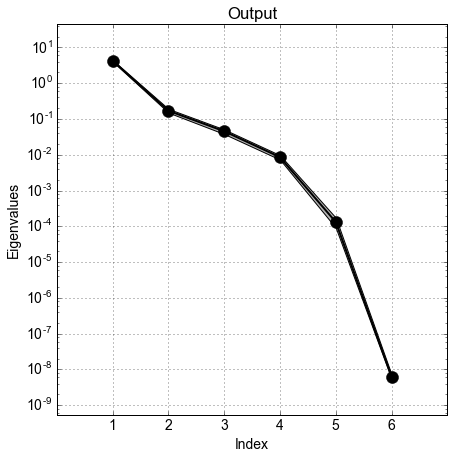

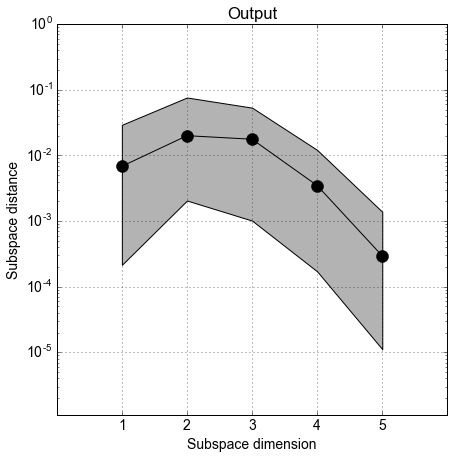

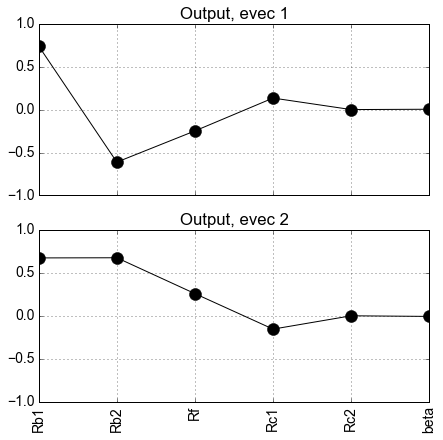

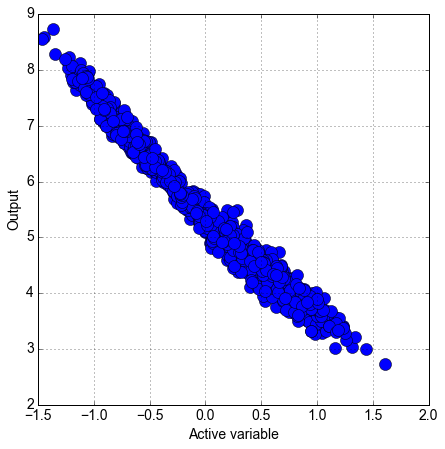

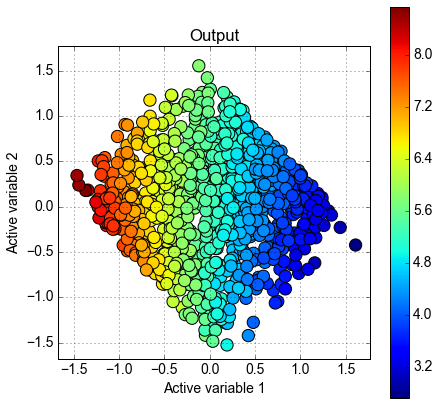

In [6]:
#Component labels
in_labels = ['Rb1', 'Rb2', 'Rf', 'Rc1', 'Rc2', 'beta']

#plot eigenvalues, subspace errors
ac.utils.plotters.eigenvalues(ss.eigenvals, ss.e_br)
ac.utils.plotters.subspace_errors(ss.sub_br)

#manually make the subspace 2D for the eigenvector and 2D summary plots
ss.partition(2)
#Compute the active variable values
y = XX.dot(ss.W1)

#Plot eigenvectors, sufficient summaries
ac.utils.plotters.eigenvectors(ss.W1, in_labels=in_labels)
ac.utils.plotters.sufficient_summary(y, f)